# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [ ]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [ ]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [ ]:
# Class names in the CIFAR-10 dataset

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

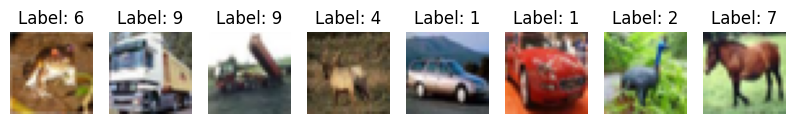

In [ ]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
num_images = 8

# Create a figure with subplots
plt.figure(figsize=(10, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')

plt.show()



In [ ]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [ ]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3639 - accuracy: 0.5117
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3540 - accuracy: 0.5158
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3422 - accuracy: 0.5177
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3362 - accuracy: 0.5242
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3163 - accuracy: 0.5298
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3054 - accuracy: 0.5344
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2925 - accuracy: 0.5366
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2830 - accuracy: 0.5410
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2781 - accuracy: 0.5422
Epoch 10/10
1563/1563 [==============================] - 31s 20m

<ipython-input-12-1ec4f8fba4bc>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


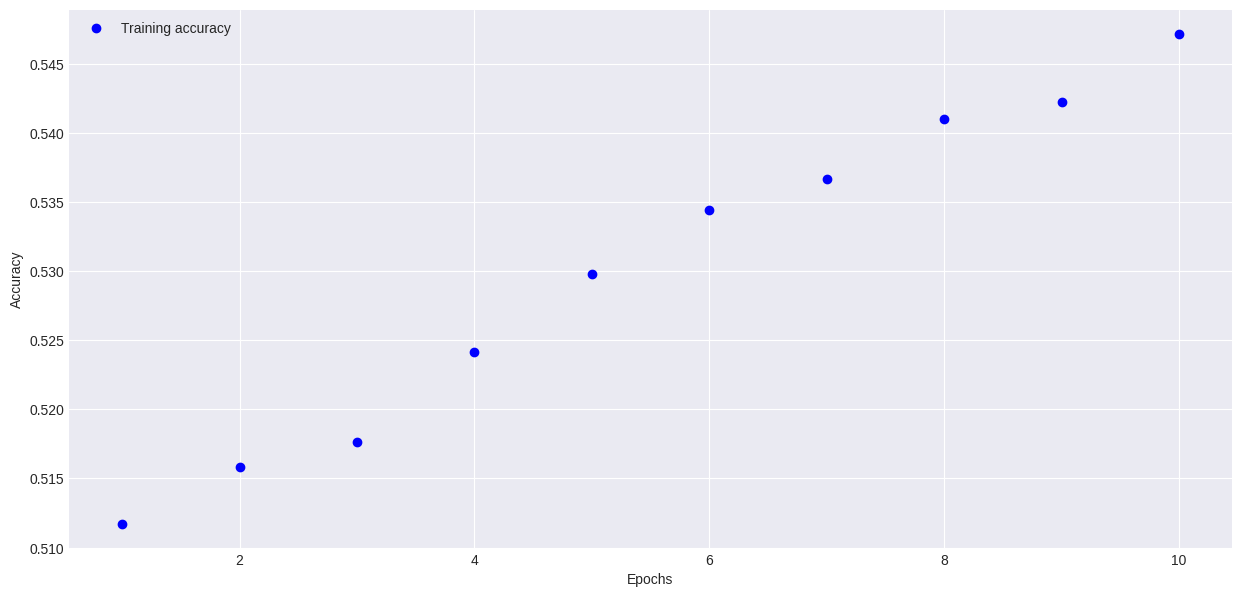

In [ ]:
 # Print the training process graph and result

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 48.25%


### CNN model

In [ ]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.1438 - accuracy: 0.9492
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1513 - accuracy: 0.9462
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1503 - accuracy: 0.9481
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1409 - accuracy: 0.9508
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1343 - accuracy: 0.9524
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.1405 - accuracy: 0.9512
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1291 - accuracy: 0.9543
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1266 - accuracy: 0.9550
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1300 - accuracy: 0.9547
Epoch 10/10
1563/1563 [==============================] - 66s 42m

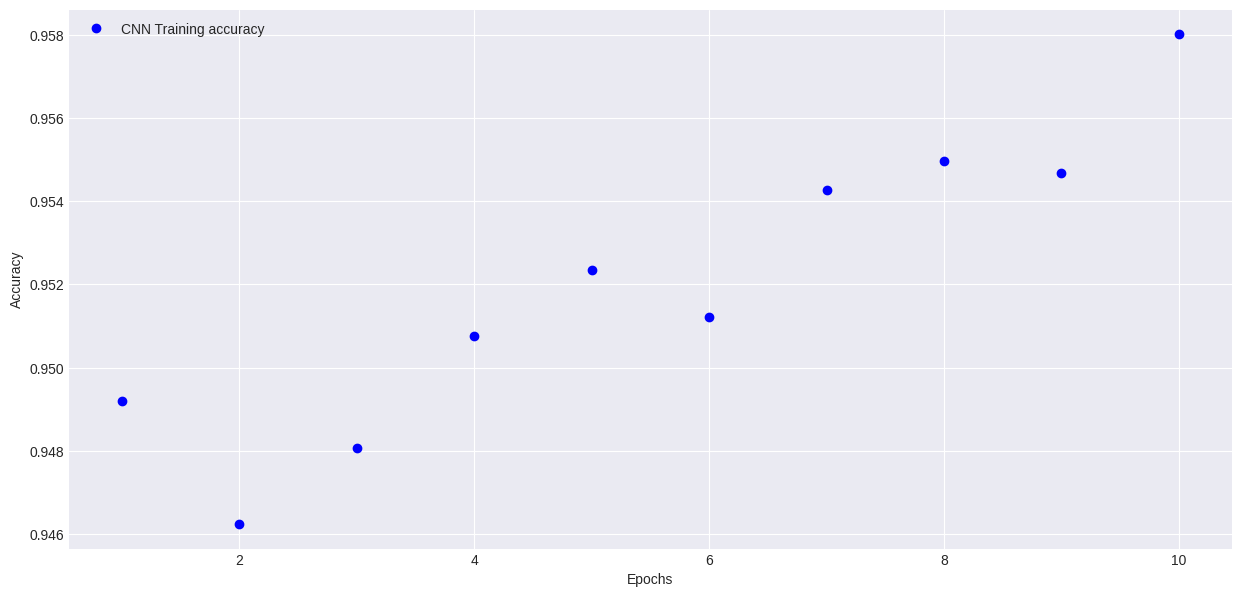

In [ ]:
# Your code to print the CNN training process graph and result
history_dict2 = history2.history
# plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-v0_8-darkgrid')


acc_values2 = history_dict2['accuracy']
epochs2 = range(1, len(acc_values2) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs2, acc_values2, 'bo', label='CNN Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


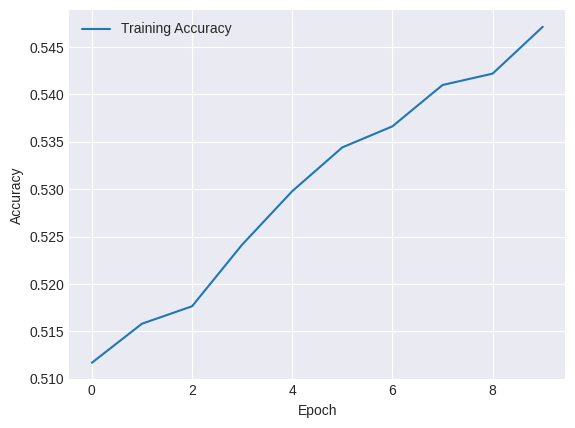

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Check if 'val_accuracy' exists in the history dictionary before plotting
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 67.93%


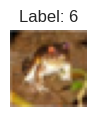

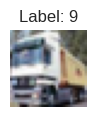

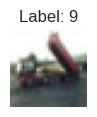

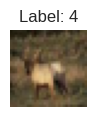

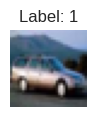

In [ ]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [ ]:
# Your code to do the above activity.
# Hint - import time
import time

In [ ]:
# Your code to do the above activity.
# Hint - Put name of optimizers
optimizers=['adam','sgd','adamax']


In [ ]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
training_times = []
accuracies = []


In [ ]:
# Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
for optimizer in optimizers:
     print('\n', optimizer, 'Optimizer')
    # Create a new CNN models with architectures different from the one provided
     model = Sequential()

     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
     model.add(MaxPooling2D((2, 2)))

     model.add(Conv2D(64, (3, 3), activation='relu'))
     model.add(MaxPooling2D((2, 2)))

     model.add(Conv2D(64, (3, 3), activation='relu'))

     model.add(Flatten())

     model.add(Dense(512, activation='relu'))
     model.add(Dense(10, activation='softmax'))



    # Compile the model with the current optimizer
     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Measure training time
     start_time =time.time()
     model.fit(X_train,y_train, epochs=3,batch_size=64,
            #validation_split=0.2,
            verbose=1)
     end_time = time.time()
     training_time = end_time -start_time
     training_times.append(training_time)

    # Evaluate the model
     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
     accuracies.append(accuracy)





 adam Optimizer
Epoch 1/3
782/782 [==============================] - 67s 84ms/step - loss: 1.5277 - accuracy: 0.4452
Epoch 2/3
782/782 [==============================] - 65s 83ms/step - loss: 1.1544 - accuracy: 0.5904
Epoch 3/3
782/782 [==============================] - 65s 83ms/step - loss: 0.9883 - accuracy: 0.6521

 sgd Optimizer
Epoch 1/3
782/782 [==============================] - 63s 80ms/step - loss: 2.1463 - accuracy: 0.2053
Epoch 2/3
782/782 [==============================] - 63s 81ms/step - loss: 1.9189 - accuracy: 0.3059
Epoch 3/3
782/782 [==============================] - 62s 80ms/step - loss: 1.7298 - accuracy: 0.3798

 adamax Optimizer
Epoch 1/3
782/782 [==============================] - 66s 83ms/step - loss: 1.6050 - accuracy: 0.4178
Epoch 2/3
782/782 [==============================] - 67s 85ms/step - loss: 1.2782 - accuracy: 0.5439
Epoch 3/3
782/782 [==============================] - 65s 84ms/step - loss: 1.1296 - accuracy: 0.6036


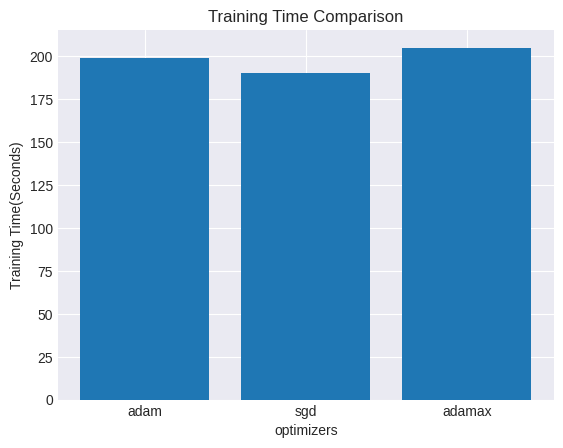

In [ ]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
plt.bar(optimizers,training_times)
plt.xlabel('optimizers')
plt.ylabel('Training Time(Seconds)')
plt.title('Training Time Comparison')
plt.show()



Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [ ]:
# Print accuracies achieved with different optimizers

for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

adam Optimizer - Test Accuracy: 66.01%
sgd Optimizer - Test Accuracy: 39.89%
adamax Optimizer - Test Accuracy: 61.62%


In [ ]:
# Your code to
# Find and print the highest achieved accuracy
accuracy= max(accuracies)
print(f"highest achieved accuracy:{accuracy *100:.2f}%")

highest achieved accuracy:66.01%
